# Comparison of MHMCMC and NUTS for Multivariate Gaussian and Ring

In [337]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
import matplotlib
plt.style.use('seaborn')
sns.set_context("poster",font_scale=1)
%matplotlib inline

In [379]:
ndim = 2
with pm.Model() as a:
    x = pm.Categorical("x",np.array([0.5,0.5]))
    mu = x *5
    y = pm.MvNormal('y', mu=mu, cov=np.identity(ndim), shape=(ndim))
    step = pm.NUTS()
    trace = pm.sample(100000)

Assigned BinaryGibbsMetropolis to x
Assigned NUTS to y
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>NUTS: [y]
>BinaryGibbsMetropolis: [x]
100%|██████████| 100500/100500 [04:08<00:00, 404.37it/s]


In [380]:
background_y = trace.get_values("y")

In [381]:
background_y.shape

(200000, 2)

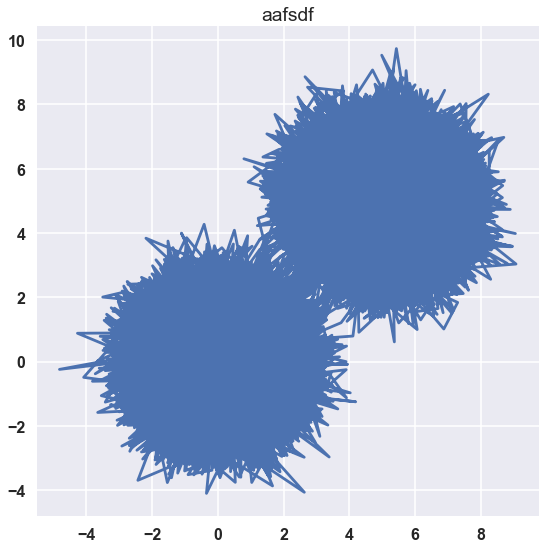

In [382]:

_ = plt.figure(figsize=(9,9))
_ = plt.plot(background_y[:,0], background_y[:,1])
_ = plt.title("aafsdf")

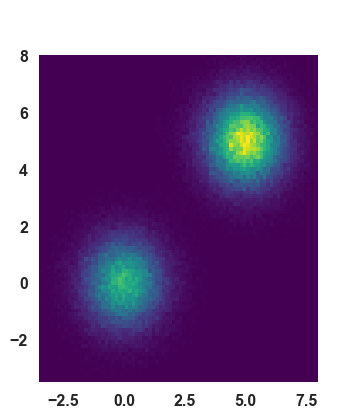

In [396]:
ndim = 2
with pm.Model() as a:
    x = pm.Categorical("x",np.array([0.5,0.5]))
    mu = x *5
    y = pm.MvNormal('y', mu=mu, cov=np.identity(ndim), shape=(ndim))
    step = pm.NUTS()
    trace = pm.sample(100)
y_NUTS = trace.get_values("y")

Assigned BinaryGibbsMetropolis to x
Assigned NUTS to y
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>NUTS: [y]
>BinaryGibbsMetropolis: [x]
 94%|█████████▍| 565/600 [00:01<00:00, 548.85it/s]/usr/local/lib/python3.5/dist-packages/pymc3-3.2-py3.5.egg/pymc3/step_methods/hmc/nuts.py:430: UserWarning: Chain 0 contains only 100 samples.
  % (self._chain_id, n))
100%|██████████| 600/600 [00:01<00:00, 508.55it/s]
/usr/local/lib/python3.5/dist-packages/pymc3-3.2-py3.5.egg/pymc3/step_methods/hmc/nuts.py:430: UserWarning: Chain 1 contains only 100 samples.
  % (self._chain_id, n))


In [401]:
ndim = 2
with pm.Model() as a:
    x = pm.Categorical("x",np.array([0.5,0.5]))
    mu = x *5
    y = pm.MvNormal('y', mu=mu, cov=np.identity(ndim), shape=(ndim))
    step = pm.NUTS()
    trace = pm.sample(100)
y_mh = trace.get_values("y")

Assigned BinaryGibbsMetropolis to x
Assigned NUTS to y
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>NUTS: [y]
>BinaryGibbsMetropolis: [x]
 94%|█████████▎| 562/600 [00:01<00:00, 382.75it/s]/usr/local/lib/python3.5/dist-packages/pymc3-3.2-py3.5.egg/pymc3/step_methods/hmc/nuts.py:430: UserWarning: Chain 1 contains only 100 samples.
  % (self._chain_id, n))
/usr/local/lib/python3.5/dist-packages/pymc3-3.2-py3.5.egg/pymc3/step_methods/hmc/nuts.py:430: UserWarning: Chain 0 contains only 100 samples.
  % (self._chain_id, n))
100%|██████████| 600/600 [00:01<00:00, 348.35it/s]


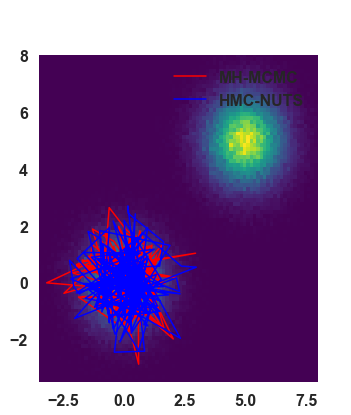

In [414]:
f, ax = plt.subplots(1,1, sharex=True)
f.set_size_inches(5,6)
ax.grid(False)
_ = ax.hist2d(x=background_y[:,0], y=background_y[:,1], bins=100, cmap="viridis")
_ = ax.set_xlim((-3.5,8))
_ = ax.set_ylim((-3.5,8))
_ = ax.plot(y_NUTS[:,0], y_NUTS[:,1], lw=1.5, c="r", label="MH-MCMC")
_ = ax.plot(y_mh[:,0], y_mh[:,1], lw=1.5, c="b", label="HMC-NUTS")
_ = ax.legend()